In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import os 
import seaborn as sns
import pandas as pd
import numpy as np
import os
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import *
import numpy as np
from glob import glob
import tensorflow as tf

In [2]:
import matplotlib.image as mpimg
import os
import shutil
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
df=pd.read_csv('reported_numbers.csv')

In [4]:
df.head()

,Country,Year,No. of cases,No. of deaths,WHO Region
0,Afghanistan,2017,161778.0,10.0,Eastern Mediterranean
1,Algeria,2017,0.0,0.0,Africa
2,Angola,2017,3874892.0,13967.0,Africa
3,Argentina,2017,0.0,1.0,Americas
4,Armenia,2017,0.0,NaN,Europe


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        1944 non-null   object 
 1   Year           1944 non-null   int64  
 2   No. of cases   1710 non-null   float64
 3   No. of deaths  1675 non-null   float64
 4   WHO Region     1944 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 76.1+ KB


In [6]:
df.describe()

,Year,No. of cases,No. of deaths
count,1944.000000,1.710000e+03,1675.000000
mean,2008.500000,3.897303e+05,1289.413731
std,5.189462,1.270270e+06,4290.739997
min,2000.000000,0.000000e+00,0.000000
25%,2004.000000,5.937500e+02,1.000000
50%,2008.500000,1.479200e+04,30.000000
75%,2013.000000,1.170978e+05,669.500000
max,2017.000000,1.533084e+07,51842.000000


In [7]:
df.columns

Index(['Country', 'Year', 'No. of cases', 'No. of deaths', 'WHO Region'], dtype='object')

In [8]:
df.isnull().sum()

Country            0
Year               0
No. of cases     234
No. of deaths    269
WHO Region         0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Country          0
Year             0
No. of cases     0
No. of deaths    0
WHO Region       0
dtype: int64

In [11]:
df.Year.value_counts()

2013    101
2014     99
2015     98
2012     98
2010     98
2016     98
2011     97
2009     94
2008     92
2007     87
2006     86
2017     85
2005     84
2004     76
2003     68
2001     68
2002     67
2000     58
Name: Year, dtype: int64

In [12]:
df.Country.value_counts()

Myanmar               18
Dominican Republic    18
El Salvador           18
Guatemala             18
Honduras              18
                      ..
Egypt                  6
South Sudan            6
Cameroon               5
Nigeria                4
Zambia                 4
Name: Country, Length: 105, dtype: int64

In [13]:
# Corrected code to use a list instead of a tuple for column selection
df1= df.groupby('Country')[["No. of cases", "No. of deaths"]].sum().reset_index()
df1.head()


,Country,No. of cases,No. of deaths
0,Afghanistan,1045271.0,363.0
1,Algeria,1044.0,4.0
2,Angola,26006152.0,125364.0
3,Argentina,2098.0,2.0
4,Armenia,355.0,0.0


In [14]:
df1.columns

Index(['Country', 'No. of cases', 'No. of deaths'], dtype='object')

In [15]:
df3= df1[["Country","No. of deaths"]]
df3.head()

,Country,No. of deaths
0,Afghanistan,363.0
1,Algeria,4.0
2,Angola,125364.0
3,Argentina,2.0
4,Armenia,0.0


In [16]:
df2 = df1[["Country","No. of cases"]]
df2.head()

,Country,No. of cases
0,Afghanistan,1045271.0
1,Algeria,1044.0
2,Angola,26006152.0
3,Argentina,2098.0
4,Armenia,355.0


In [17]:
df2 = df2.sort_values("No. of cases", ascending = False)

In [18]:
#the following function allows me to print the data on the top of my bars
def data_graph (axis, width, height):
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    for p in axis.patches:
        axis.annotate ("{0:.1f}".format(p.get_height()), (p.get_x()+width, p.get_height()+height))

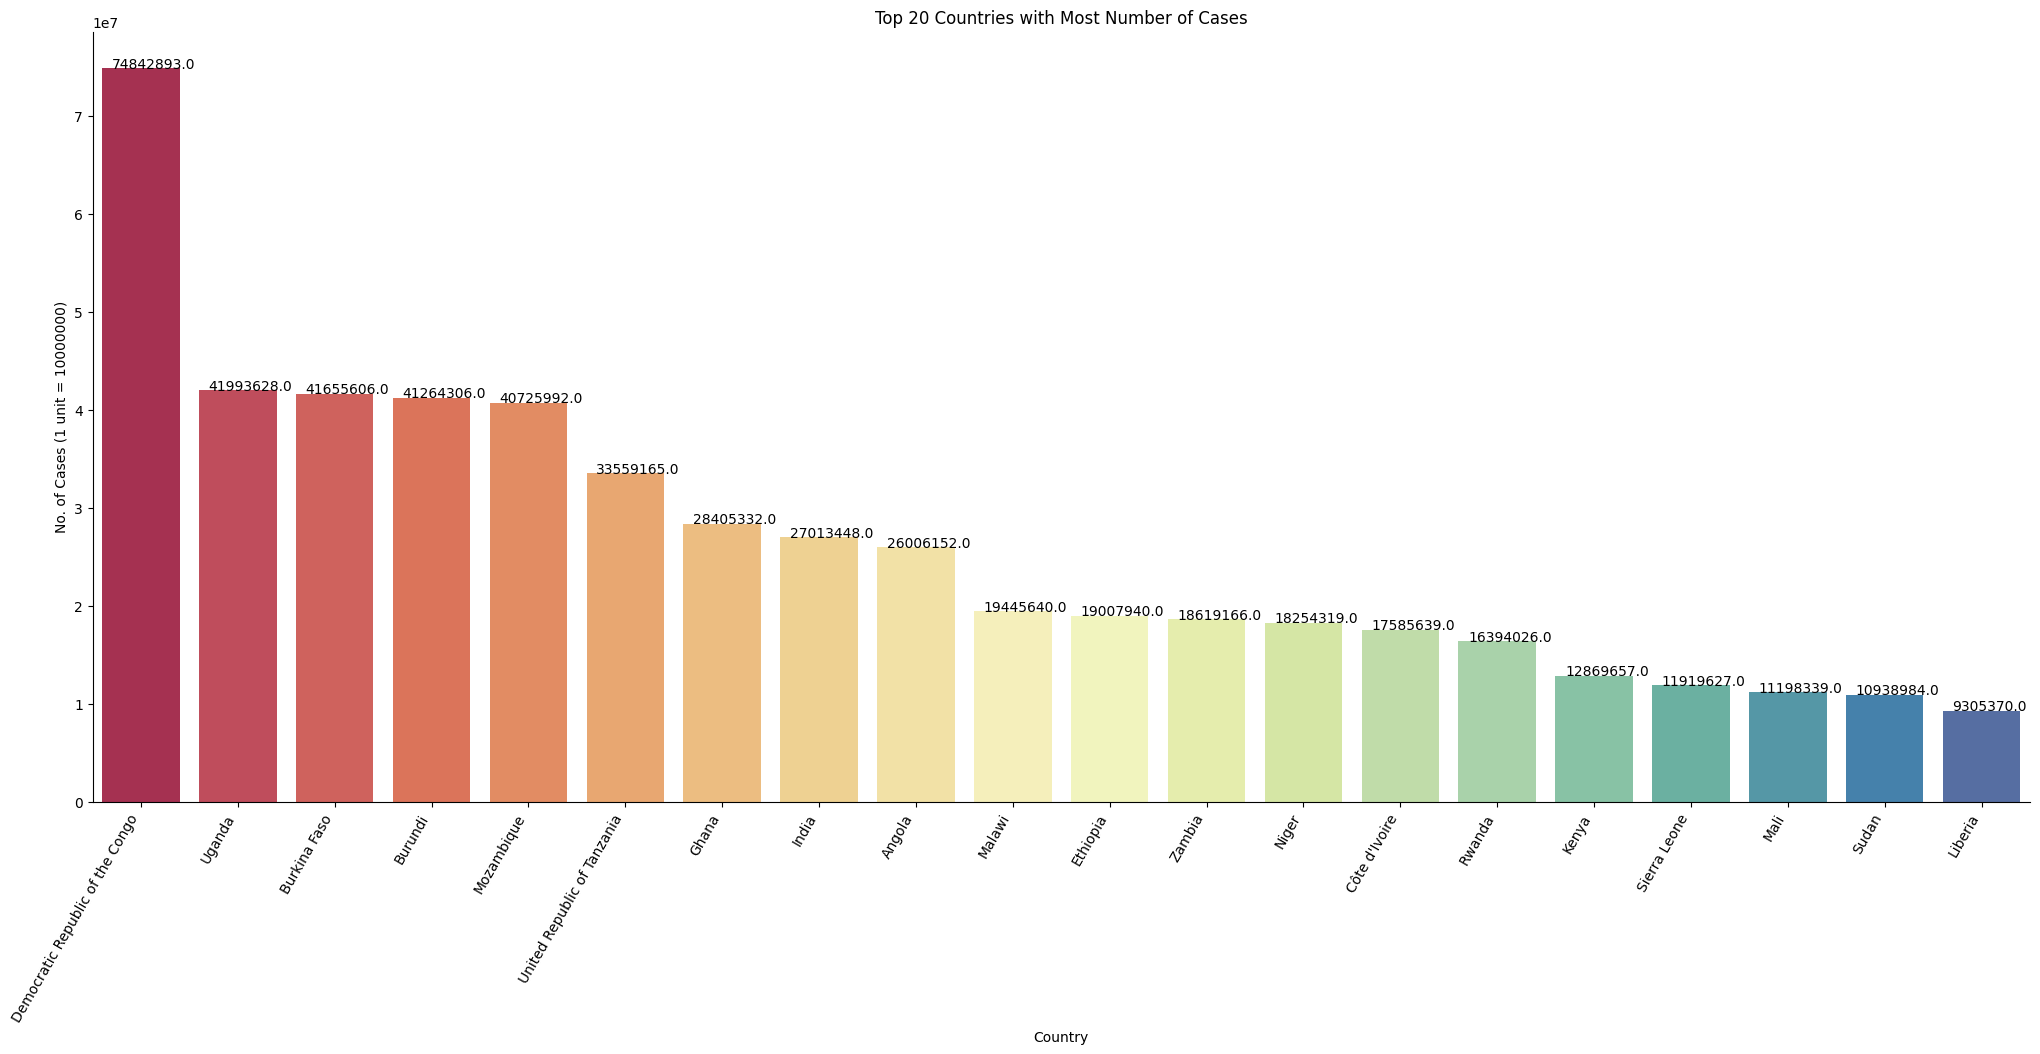

In [19]:
plt.figure(figsize = (25,10))
ax = sns.barplot(x="Country", y= "No. of cases", data=df2[:20] ,palette = "Spectral")
plt.title ("Top 20 Countries with Most Number of Cases")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("Country")
plt.ylabel("No. of Cases (1 unit = 10000000)")
data_graph(ax,0.1,10)
plt.show()

In [20]:
df3 = df3.sort_values("No. of deaths", ascending = False)

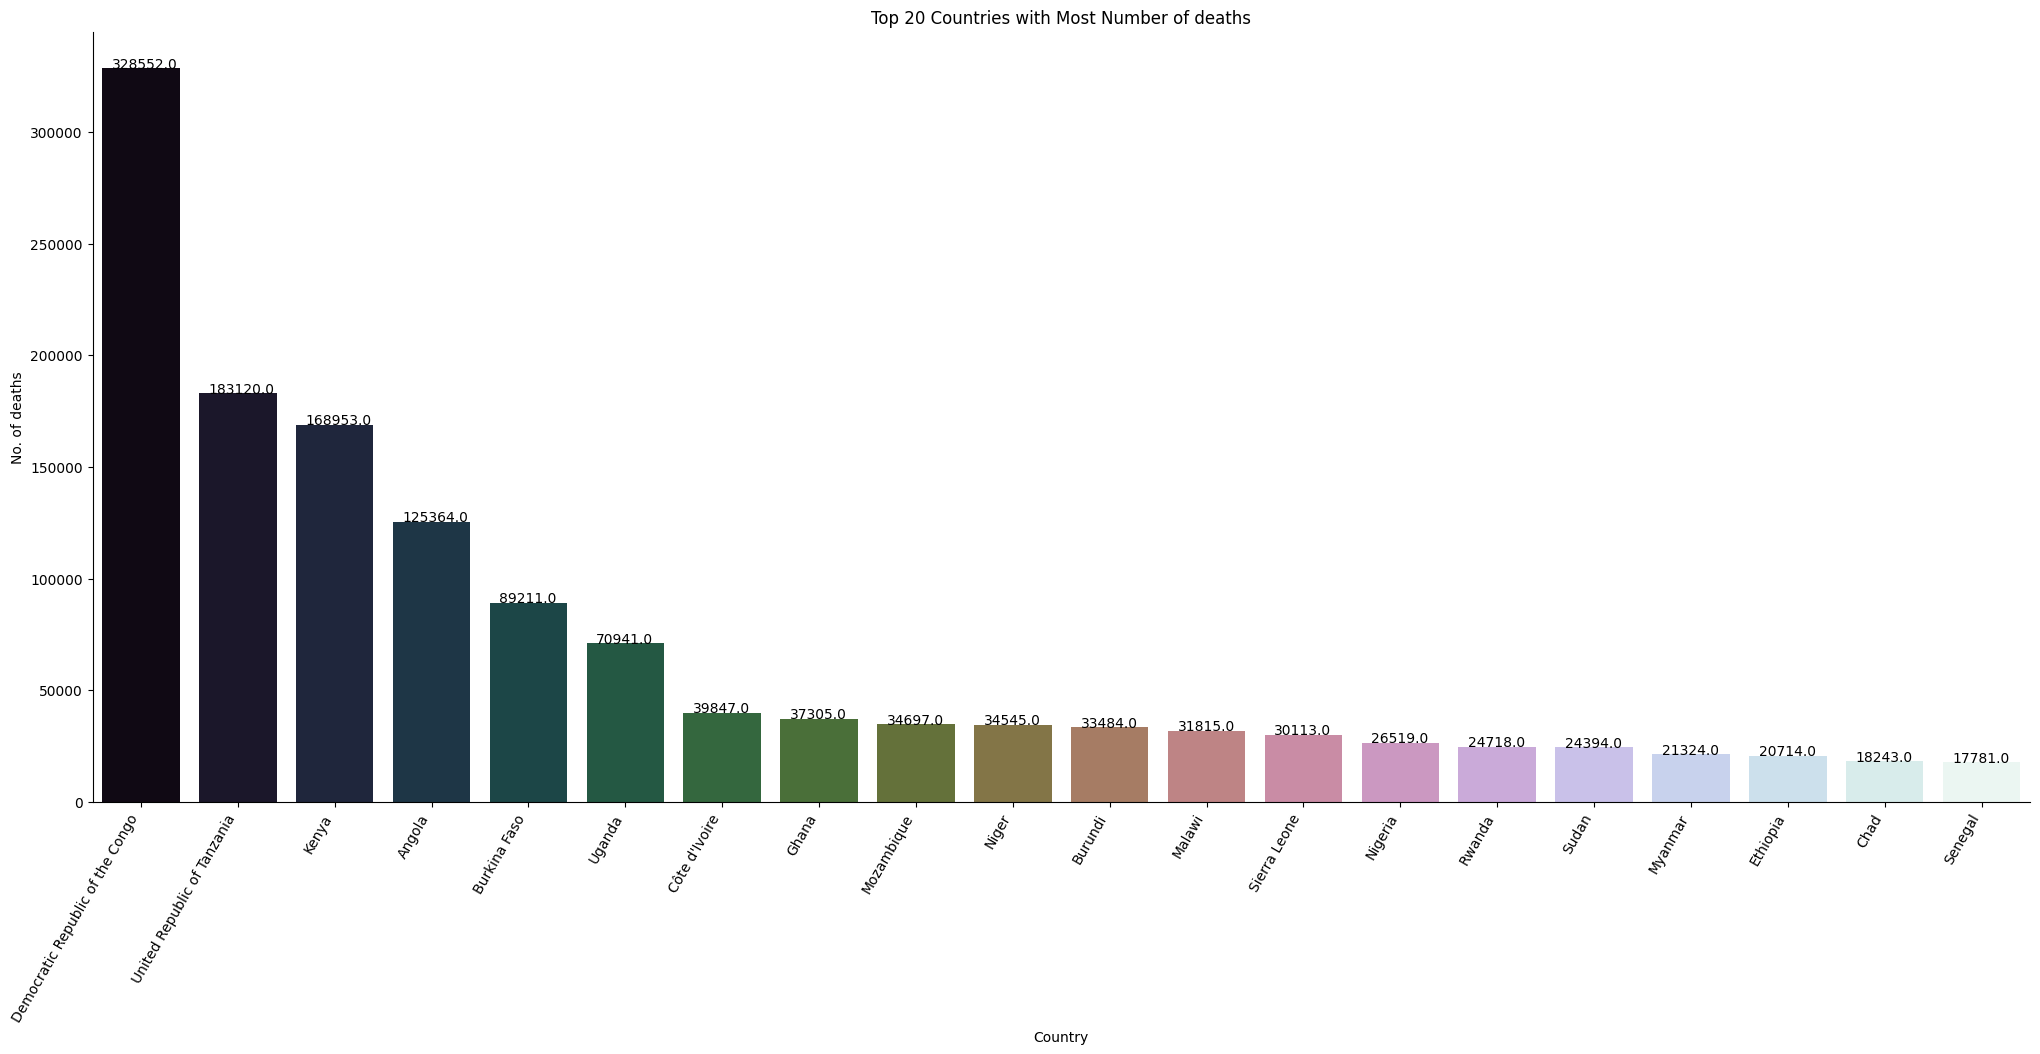

In [21]:
plt.figure(figsize = (25,10))
ax = sns.barplot(x="Country", y= "No. of deaths", data=df3[:20] ,palette = "cubehelix")
plt.title ("Top 20 Countries with Most Number of deaths")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("Country")
plt.ylabel("No. of deaths")
data_graph(ax,0.1,10)
plt.show()

In [22]:
df4 = df.groupby("WHO Region")[["No. of cases","No. of deaths"]].sum().reset_index()
df4.head()

,WHO Region,No. of cases,No. of deaths
0,Africa,545111852.0,1480850.0
1,Americas,13433321.0,11039.0
2,Eastern Mediterranean,15841260.0,26764.0
3,Europe,112675.0,25.0
4,South-East Asia,38305249.0,49802.0


In [23]:
df5 = df4[["WHO Region","No. of cases"]]
df5.head()

,WHO Region,No. of cases
0,Africa,545111852.0
1,Americas,13433321.0
2,Eastern Mediterranean,15841260.0
3,Europe,112675.0
4,South-East Asia,38305249.0


In [24]:
df6 = df4[["WHO Region","No. of deaths"]]
df6.head()

,WHO Region,No. of deaths
0,Africa,1480850.0
1,Americas,11039.0
2,Eastern Mediterranean,26764.0
3,Europe,25.0
4,South-East Asia,49802.0


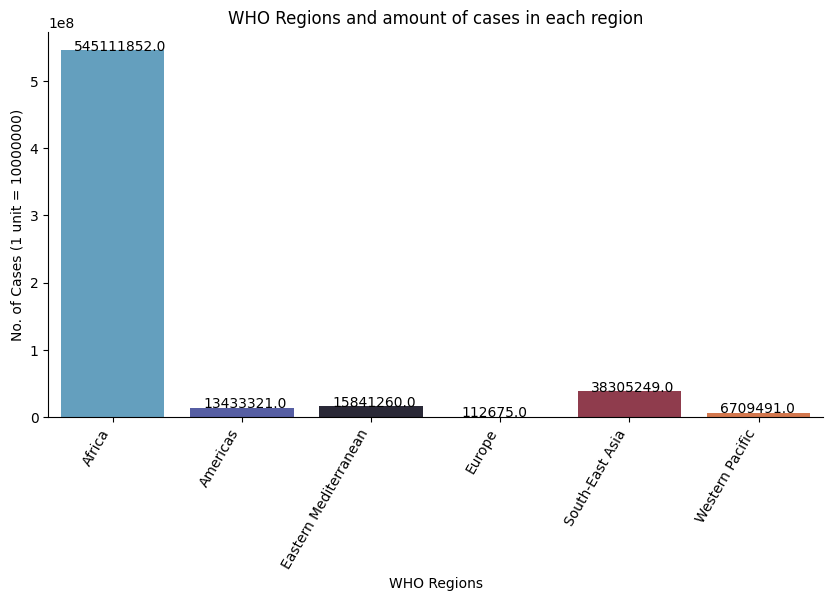

In [25]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x="WHO Region", y= "No. of cases", data=df5 ,palette = "icefire")
plt.title ("WHO Regions and amount of cases in each region")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("WHO Regions")
plt.ylabel("No. of Cases (1 unit = 10000000)")
data_graph(ax,0.1,10)
plt.show()

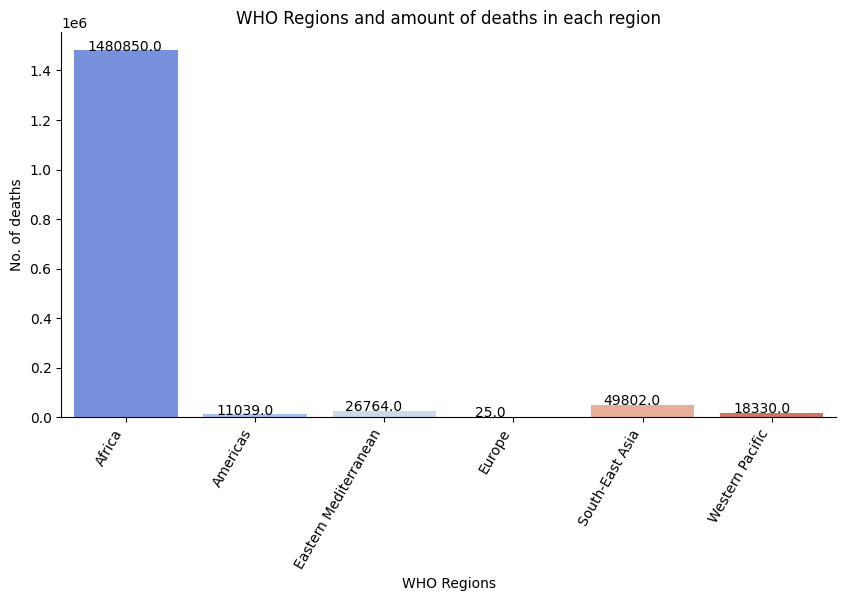

In [26]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x="WHO Region", y= "No. of deaths", data=df6 ,palette = "coolwarm")
plt.title ("WHO Regions and amount of deaths in each region")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("WHO Regions")
plt.ylabel("No. of deaths")
data_graph(ax,0.1,10)
plt.show()

In [27]:
df7 = df.groupby("Year")[["No. of cases","No. of deaths"]].sum().reset_index()
df7.head()

,Year,No. of cases,No. of deaths
0,2000,5279182.0,21419.0
1,2001,5534764.0,26162.0
2,2002,5335247.0,70683.0
3,2003,8243454.0,91247.0
4,2004,9389638.0,87926.0


In [28]:
df8 = df7.set_index(["Year"])


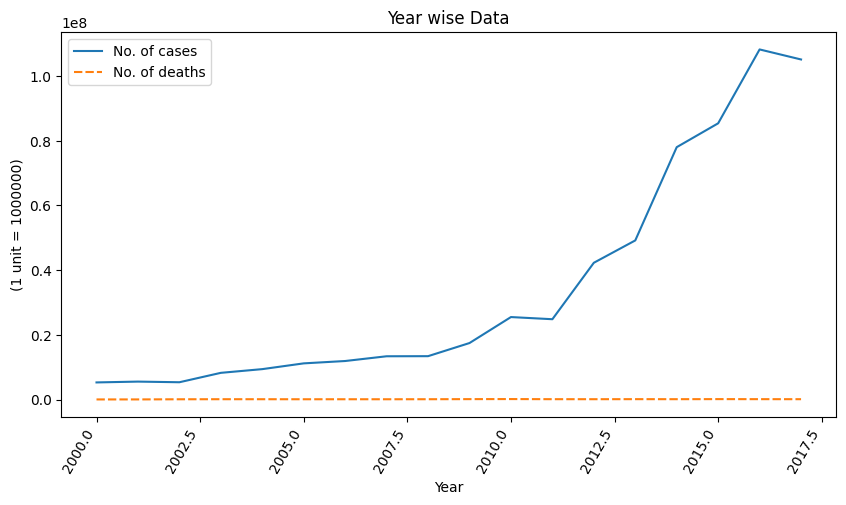

In [29]:
plt.figure(figsize = (10,5))
ax = sns.lineplot(data=df8)
plt.title ("Year wise Data")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("Year")
plt.ylabel("(1 unit = 1000000)")
plt.show()

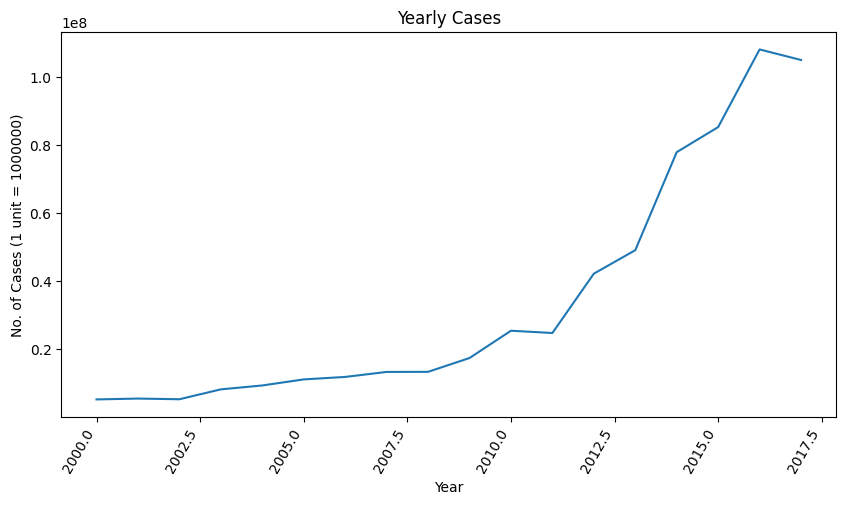

In [30]:
plt.figure(figsize = (10,5))
ax = sns.lineplot(x = "Year",y= "No. of cases",data=df7)
plt.title ("Yearly Cases")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("Year")
plt.ylabel("No. of Cases (1 unit = 1000000)")
plt.show()

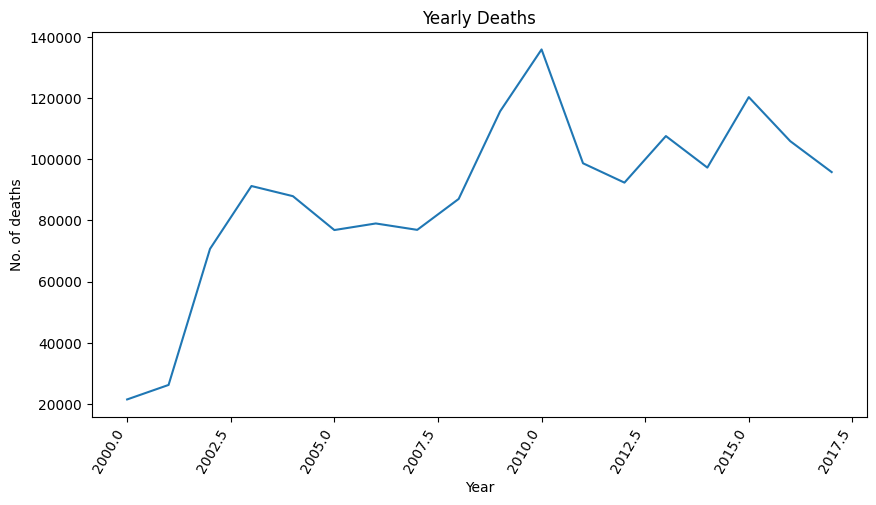

In [31]:
plt.figure(figsize = (10,5))
ax = sns.lineplot(x = "Year",y= "No. of deaths",data=df7)
plt.title ("Yearly Deaths")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("Year")
plt.ylabel("No. of deaths")
plt.show()

In [32]:
pred_df1 = df['Country'].str.get_dummies()
pred_df2 = df['WHO Region'].str.get_dummies()

In [33]:
frames = [df,pred_df1,pred_df2]
pred_df = pd.concat(frames,axis=1)
pred_df.head()

,Country,Year,No. of cases,No. of deaths,WHO Region,Afghanistan,Algeria,Angola,Argentina,Armenia,...,Viet Nam,Yemen,Zambia,Zimbabwe,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific
0,Afghanistan,2017,161778.0,10.0,Eastern Mediterranean,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Algeria,2017,0.0,0.0,Africa,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Angola,2017,3874892.0,13967.0,Africa,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Argentina,2017,0.0,1.0,Americas,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Bangladesh,2017,4893.0,13.0,South-East Asia,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


C:\Users\ibuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


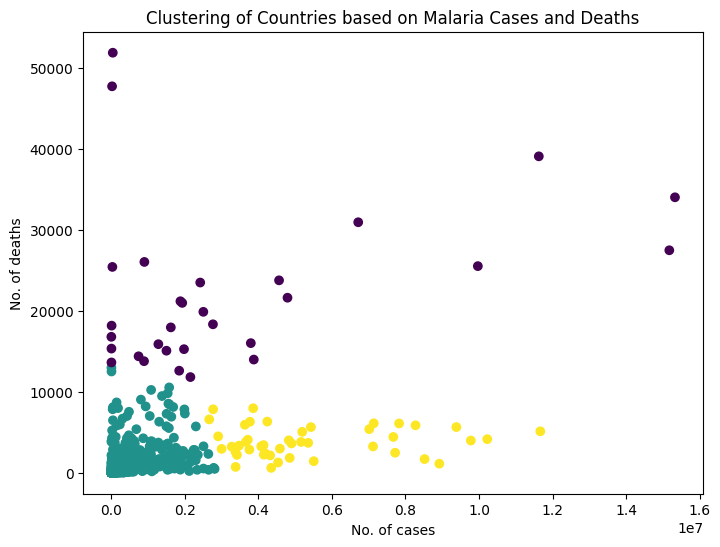

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = df[['No. of cases', 'No. of deaths']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['No. of cases'], df['No. of deaths'], c=df['Cluster'], cmap='viridis')
plt.xlabel('No. of cases')
plt.ylabel('No. of deaths')
plt.title('Clustering of Countries based on Malaria Cases and Deaths')
plt.show()


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
X = df[['Year']]
y = df['No. of cases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 1532560985729.8992


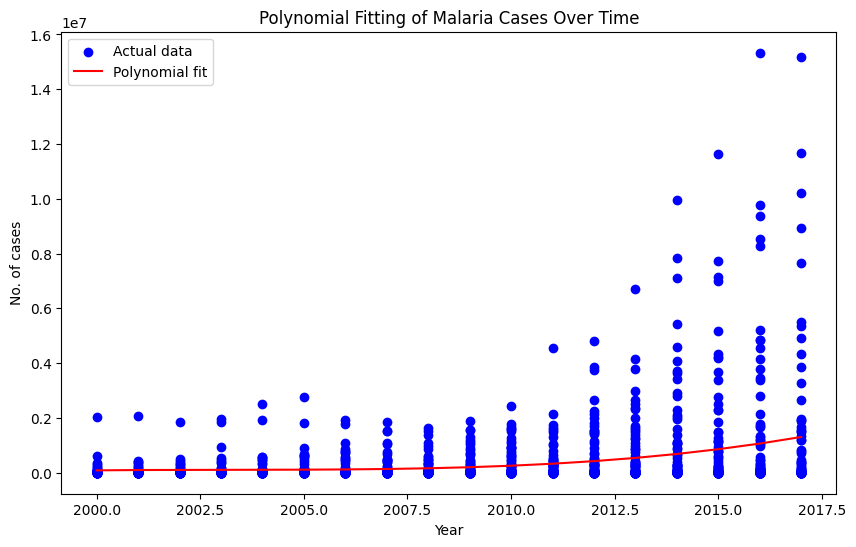

In [36]:
from sklearn.preprocessing import PolynomialFeatures


# Extract relevant features
X = df['Year'].values.reshape(-1, 1)
y = df['No. of cases'].values

# Polynomial features transformation
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Polynomial regression
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Predictions
y_poly_pred = poly_reg.predict(X_poly)

# Visualize the polynomial fitting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_poly_pred, color='red', label='Polynomial fit')
plt.title('Polynomial Fitting of Malaria Cases Over Time')
plt.xlabel('Year')
plt.ylabel('No. of cases')
plt.legend()
plt.show()


C:\Users\ibuku\AppData\Local\Temp\ipykernel_3632\1626206528.py:5: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)
C:\Users\ibuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


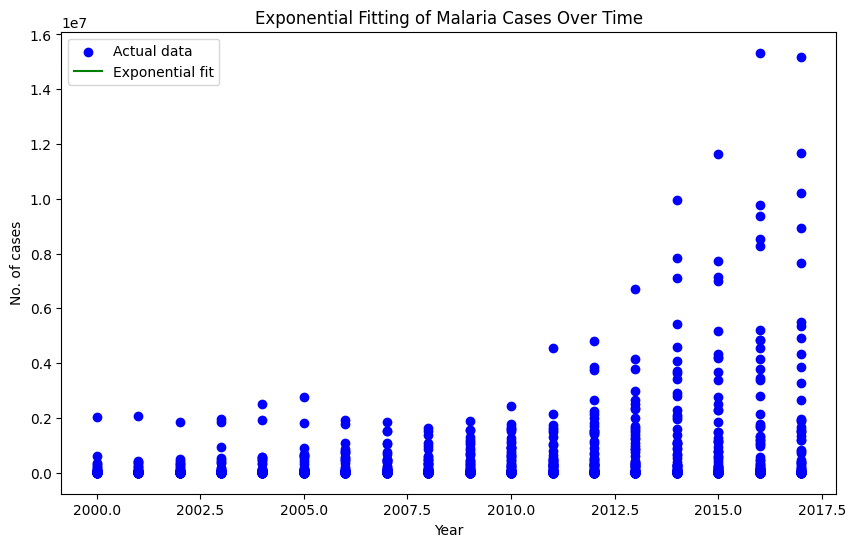

In [37]:
from scipy.optimize import curve_fit

# Define exponential function
def exponential_func(x, a, b):
    return a * np.exp(b * x)

# Curve fitting
popt, pcov = curve_fit(exponential_func, X.flatten(), y)

# Predictions
y_exp_pred = exponential_func(X.flatten(), *popt)

# Visualize the exponential fitting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_exp_pred, color='green', label='Exponential fit')
plt.title('Exponential Fitting of Malaria Cases Over Time')
plt.xlabel('Year')
plt.ylabel('No. of cases')
plt.legend()
plt.show()


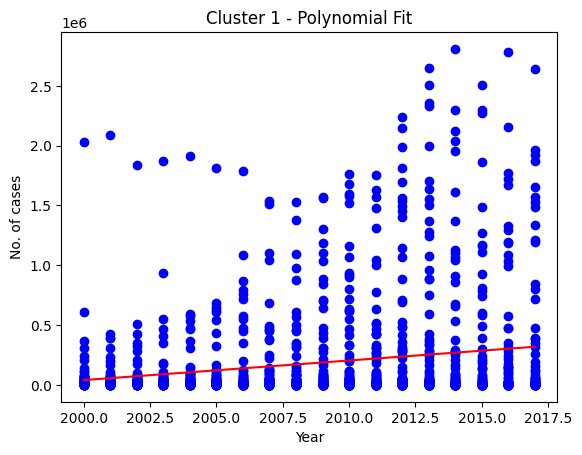

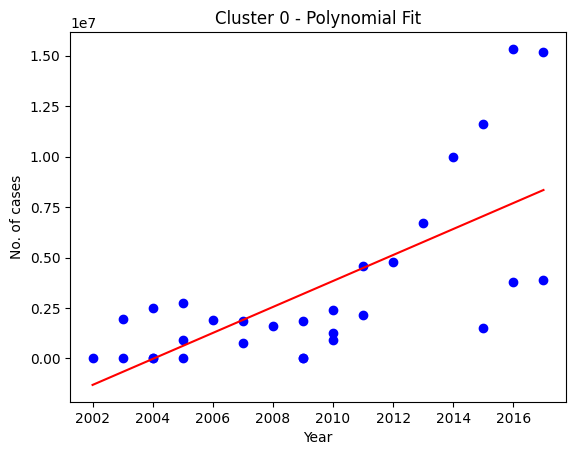

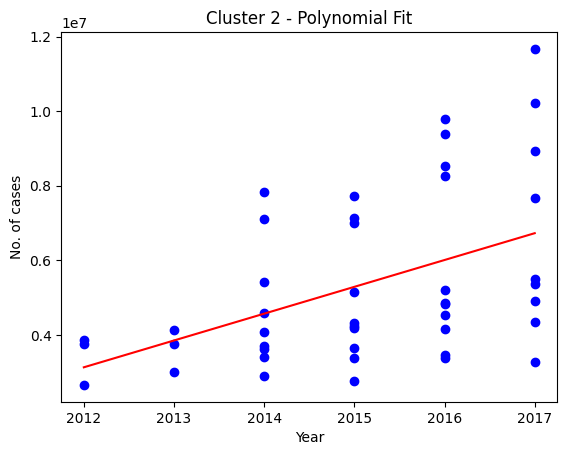

In [38]:
# Iterate over unique cluster labels
for cluster_label in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster_label]
    X_cluster = cluster_data['Year'].values.reshape(-1, 1)
    y_cluster = cluster_data['No. of cases'].values  # Fix typo here

    # Polynomial fitting
    poly_reg = LinearRegression()
    poly_reg.fit(X_cluster, y_cluster)
    
    # Visualize the polynomial fit
    plt.scatter(X_cluster, y_cluster, color='blue')
    plt.plot(X_cluster, poly_reg.predict(X_cluster), color='red')
    plt.title(f'Cluster {cluster_label} - Polynomial Fit')
    plt.xlabel('Year')
    plt.ylabel('No. of cases')
    plt.show()

In [39]:
import itertools
#import imutils
import matplotlib.pyplot as plt
from keras.applications import VGG16
from sklearn.metrics import accuracy_score,confusion_matrix 
from sklearn.model_selection import train_test_split 
from keras.preprocessing import image
from keras.models import Model,Sequential
from keras.layers import Flatten,Dense,Dropout,Conv2D,MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop,Adam 
from keras.preprocessing.image import ImageDataGenerator
import shutil

In [40]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import shutil
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
source_dir=r'C:\Users\ibuku\Downloads\cell_images\cell_images'  
train_dir = r'C:\User\ibuku\Downloads\achieve\dataset\train'
test_dir = r'C:\Users\ibuku\Downloads\achieve\dataset\test'

In [41]:
source_dir

'C:\\Users\\ibuku\\Downloads\\cell_images\\cell_images'

In [42]:
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Define classes
classes = ['Parasitized', 'Uninfected']

# Create train and test subdirectories for each class
for cls in classes:
    # Create subdirectories in train directory
    train_cls_dir = os.path.join(train_dir, cls)
    os.makedirs(train_cls_dir, exist_ok=True)
    
    # Create subdirectories in test directory
    test_cls_dir = os.path.join(test_dir, cls)
    os.makedirs(test_cls_dir, exist_ok=True)

    # Get list of files for the current class
    cls_files = os.listdir(os.path.join(source_dir, cls))
    
    # Split files into train and test sets
    train_files, test_files = train_test_split(cls_files, test_size=0.2, random_state=42)
    
    # Copy train files to train directory
    for file in train_files:
        src = os.path.join(source_dir, cls, file)
        dst = os.path.join(train_cls_dir, file)
        shutil.copy(src, dst)
    
    # Copy test files to test directory
    for file in test_files:
        src = os.path.join(source_dir, cls, file)
        dst = os.path.join(test_cls_dir, file)
        shutil.copy(src, dst)
shutil.rmtree(os.path.join(train_dir, 'cell_images'), ignore_errors=True)
shutil.rmtree(os.path.join(test_dir, 'cell_images'), ignore_errors=True)

In [43]:
from PIL import Image
image_path= r'C:\Users\ibuku\Downloads\cell_images\cell_images\Parasitized\C33P1thinF_IMG_20150619_114756a_cell_179.png'
image = Image.open(image_path)

# Get the dimensions (width x height) of the image
width, height = image.size

print("Image size:", width, "x", height)

Image size: 142 x 163


In [44]:
WIDTH = 151
HEIGHT = 136
BATCH_SIZE = 32
CHANNELS =3
EPOCHS = 30
NEW_SIZE = 136

In [45]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
            directory=train_dir,
            shuffle=True,
            image_size=(WIDTH,HEIGHT),
            batch_size = BATCH_SIZE,
)

Found 22048 files belonging to 2 classes.


In [46]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
            directory=test_dir ,
            shuffle=True,
            image_size=(WIDTH,HEIGHT),
            batch_size = BATCH_SIZE,
)

Found 5510 files belonging to 2 classes.


In [47]:
classnames = train_dataset.class_names
classnames

['Parasitized', 'Uninfected']

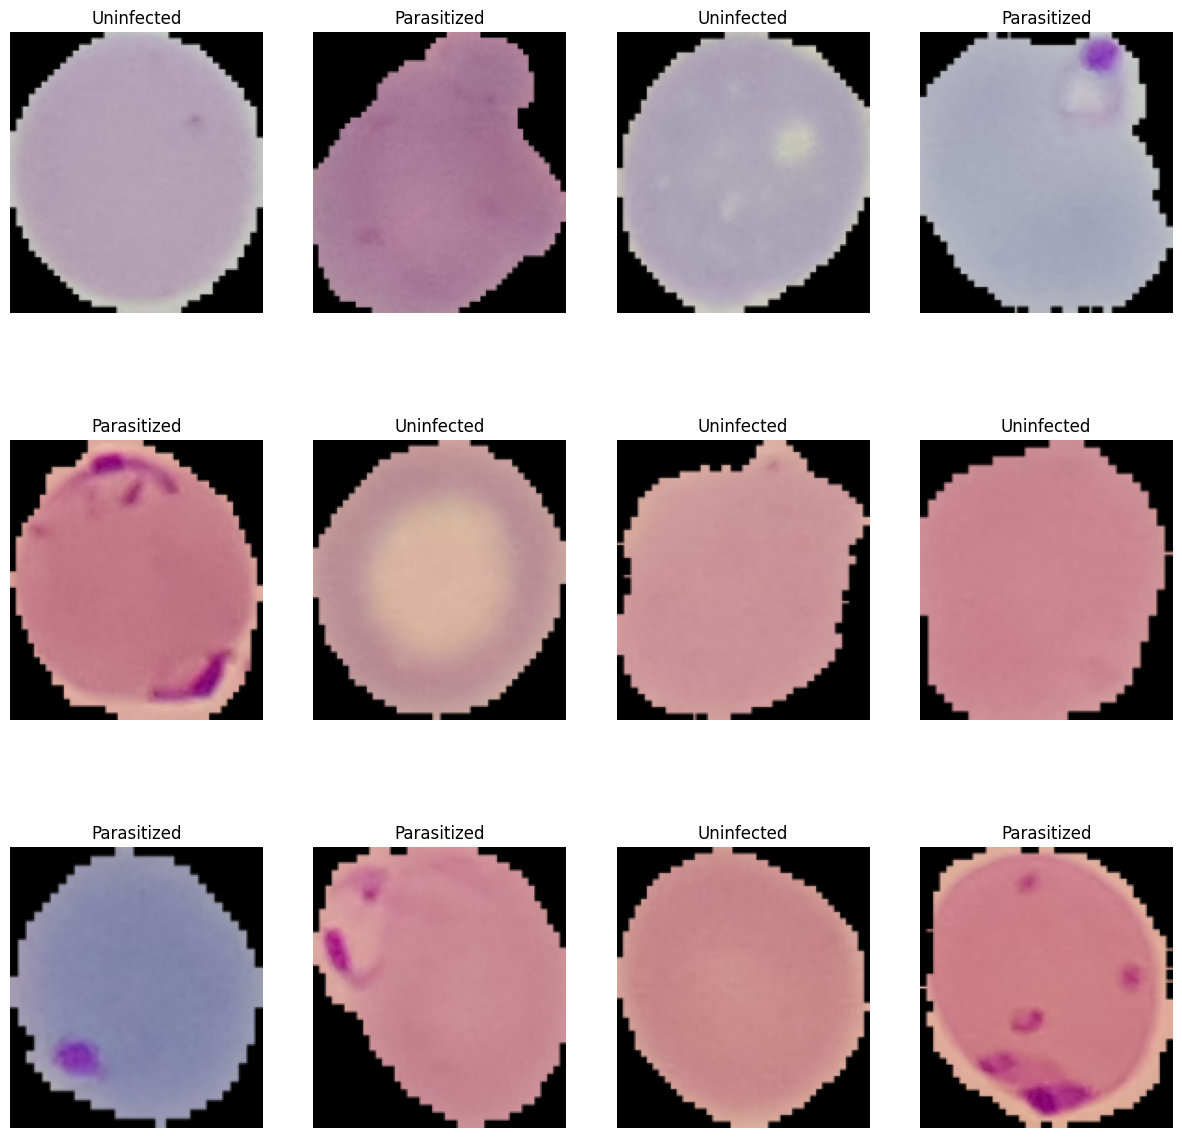

In [48]:
plt.figure(figsize = (15,15))
for image, label in train_dataset.take(1):
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(classnames[label[i]])
        plt.axis('off')

In [49]:
# Assign the directory of Parasitized and Uninfected cell images
parasitized_dir = r"C:\Users\ibuku\Downloads\cell_images\cell_images\Parasitized/"
uninfected_dir = r"C:\Users\ibuku\Downloads\cell_images\cell_images\Uninfected/"

print ('Total of Parasitized cell images: ', len(os.listdir(parasitized_dir)))
print ('Total of Uninfected cell images: ', len(os.listdir(uninfected_dir)))

Total of Parasitized cell images:  13780
Total of Uninfected cell images:  13780


In [50]:
from matplotlib.image import imread

In [51]:
# Print the shape image of one training data
image_shape = parasitized_dir + "/C99P60ThinF_IMG_20150918_141001_cell_133.png"
print("Shape of image: ",imread(image_shape).shape)

Shape of image:  (145, 142, 3)


In [52]:

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'  
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),  
    batch_size=32,
    class_mode='binary'  
)

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


## CNN

In [53]:
# Defining CNN as sequential model
model = Sequential()

# Adding convolution and max-pooling layers
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(134,131,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(134,131,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(134,131,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=256, kernel_size=(3,3),input_shape=(134,131,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

# Flattening image from layers
model.add(Flatten())

# Adding dense layers
model.add(Dense(128,activation='relu'))
# Adding dropout to minimize overfitting issue
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=["accuracy"])
# model.compile (loss = 'categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

# Show summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 134, 131, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 67, 65, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 67, 65, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 33, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 33, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

In [54]:
# Create early stop function for training
early_stop = EarlyStopping(monitor="val_loss",patience=5, verbose=True)

In [55]:
# Training the model
history = model.fit(train_generator,validation_data=train_generator,epochs=10,callbacks=[early_stop],verbose=True)

Epoch 1/10
689/689 [==============================] - 540s 781ms/step - loss: 0.4631 - accuracy: 0.7358 - val_loss: 0.1439 - val_accuracy: 0.9545
Epoch 2/10
689/689 [==============================] - 526s 763ms/step - loss: 0.1416 - accuracy: 0.9570 - val_loss: 0.1196 - val_accuracy: 0.9609
Epoch 3/10
689/689 [==============================] - 532s 772ms/step - loss: 0.1271 - accuracy: 0.9596 - val_loss: 0.1066 - val_accuracy: 0.9625
Epoch 4/10
689/689 [==============================] - 519s 753ms/step - loss: 0.1162 - accuracy: 0.9611 - val_loss: 0.0973 - val_accuracy: 0.9654
Epoch 5/10
689/689 [==============================] - 496s 720ms/step - loss: 0.1086 - accuracy: 0.9628 - val_loss: 0.1027 - val_accuracy: 0.9634
Epoch 6/10
689/689 [==============================] - 498s 722ms/step - loss: 0.1004 - accuracy: 0.9653 - val_loss: 0.0870 - val_accuracy: 0.9679
Epoch 7/10
689/689 [==============================] - 509s 739ms/step - loss: 0.0906 - accuracy: 0.9682 - val_loss: 0.0734 -

## Training and validation (test) accuracy 

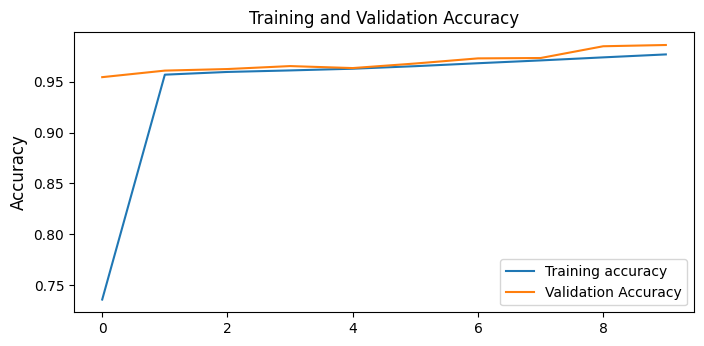

In [56]:
acc = history.history["accuracy"]
loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(acc,label="Training accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.show()

## Training and validation (test) loss

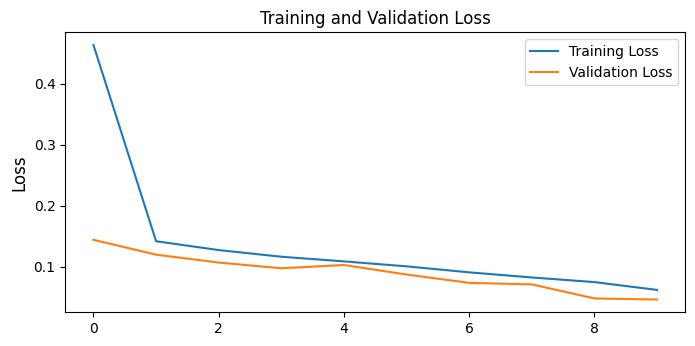

In [57]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label = "Validation Loss")
plt.legend()
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Loss",fontsize=12)
plt.show()

In [58]:
import random
from tensorflow.keras.preprocessing import image

In [59]:
class_labels = ['parasitized', 'Uninfected']


## Accuracy for CNN model 

173/173 [==============================] - 25s 146ms/step - loss: 0.1433 - accuracy: 0.9601
Testing Accuracy: 0.9600725769996643
1/1 [==============================] - 0s 39ms/step


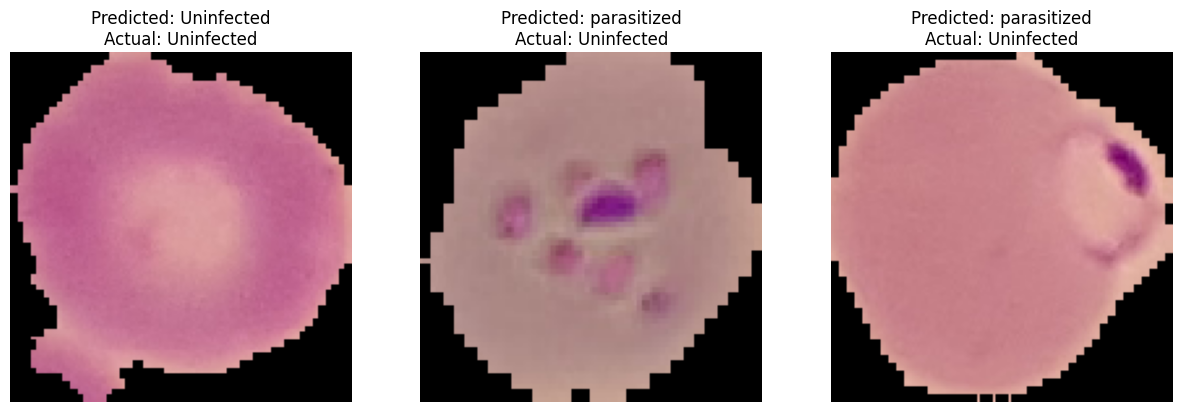

In [60]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Testing Accuracy: {test_accuracy}')

# Display sample images from the test set with predicted and actual labels
sample_size = 3
fig, axs = plt.subplots(1, sample_size, figsize=(15, 5))

for j in range(sample_size):
    # Select a random image from the test set
    random_image_path = random.choice(test_generator.filepaths)
    
    # Load and preprocess the image
    img = image.load_img(random_image_path, target_size=(134, 131))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    # Predict the class of the image
    prediction = model.predict(img_array)
    predicted_class = np.round(prediction).astype(int)[0][0]

    # Extract the actual label from the image path
    if 'uninfected' in random_image_path:
        actual_label = 0  # uninfected
    else:
        actual_label = 1  # parasitized

    # Display the image
    axs[j].imshow(img)
    axs[j].set_title(f"Predicted: {class_labels[predicted_class]}\nActual: {class_labels[actual_label]}")
    axs[j].axis('off')

plt.show()


## VGG 16 MODEL 

In [61]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(134, 131, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Flatten the output of the base model
x = Flatten()(base_model.output)

# Add fully connected layers
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(50, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 134, 131, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 134, 131, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 134, 131, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 67, 65, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 67, 65, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 67, 65, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 33, 32, 128)       0     

## Training the model for VGG 16 

In [62]:
# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=test_generator)

Epoch 1/10
689/689 [==============================] - 1448s 2s/step - loss: 0.2653 - accuracy: 0.8913 - val_loss: 0.1999 - val_accuracy: 0.9267
Epoch 2/10
689/689 [==============================] - 1488s 2s/step - loss: 0.1918 - accuracy: 0.9269 - val_loss: 0.1859 - val_accuracy: 0.9299
Epoch 3/10
689/689 [==============================] - 1433s 2s/step - loss: 0.1700 - accuracy: 0.9366 - val_loss: 0.1556 - val_accuracy: 0.9405
Epoch 4/10
689/689 [==============================] - 1432s 2s/step - loss: 0.1670 - accuracy: 0.9355 - val_loss: 0.1598 - val_accuracy: 0.9383
Epoch 5/10
689/689 [==============================] - 1427s 2s/step - loss: 0.1535 - accuracy: 0.9410 - val_loss: 0.1652 - val_accuracy: 0.9372
Epoch 6/10
689/689 [==============================] - 1501s 2s/step - loss: 0.1511 - accuracy: 0.9443 - val_loss: 0.1534 - val_accuracy: 0.9423
Epoch 7/10
689/689 [==============================] - 1600s 2s/step - loss: 0.1414 - accuracy: 0.9468 - val_loss: 0.1567 - val_accuracy:

## Training and Validation (test) accuracy 

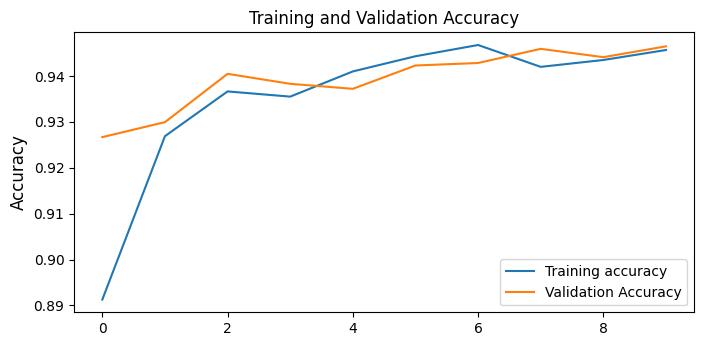

In [63]:
acc = history.history["accuracy"]
loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(acc,label="Training accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.show()

## Training and validation (test) loss 

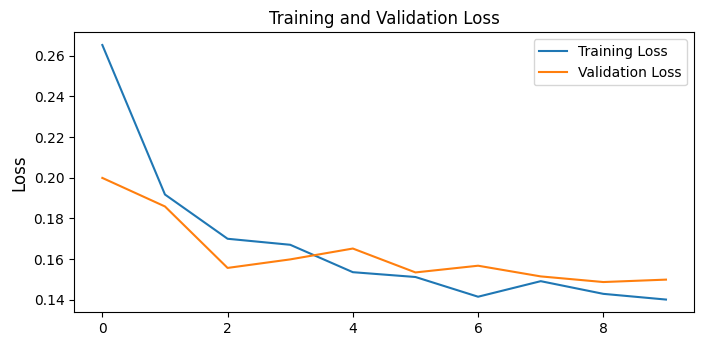

In [64]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label = "Validation Loss")
plt.legend()
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Loss",fontsize=12)
plt.show()

## Accuracy of VGG 16 model on the data 

173/173 [==============================] - 278s 2s/step - loss: 0.1499 - accuracy: 0.9465
Testing Accuracy: 0.9464609622955322
1/1 [==============================] - 0s 98ms/step


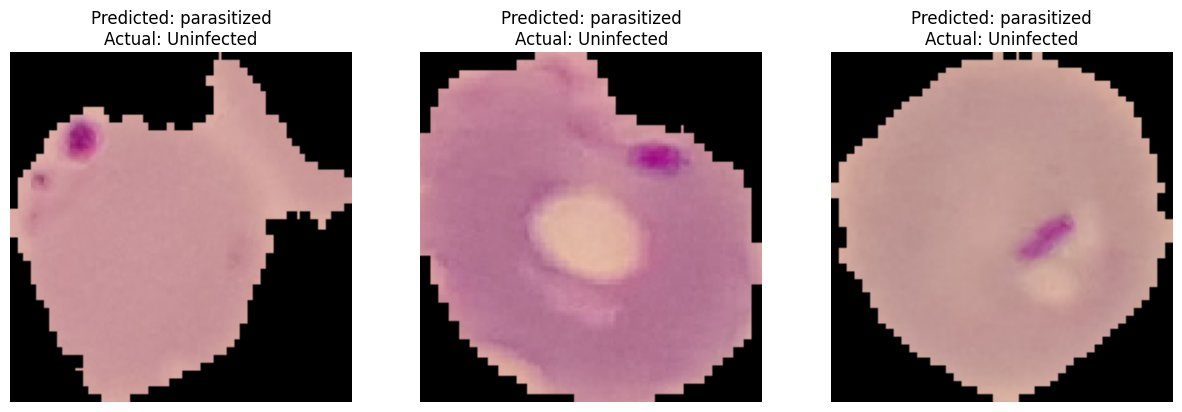

In [65]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Testing Accuracy: {test_accuracy}')

# Display sample images from the test set with predicted and actual labels
sample_size = 3
fig, axs = plt.subplots(1, sample_size, figsize=(15, 5))

for j in range(sample_size):
    # Select a random image from the test set
    random_image_path = random.choice(test_generator.filepaths)
    
    # Load and preprocess the image
    img = image.load_img(random_image_path, target_size=(134, 131))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    # Predict the class of the image
    prediction = model.predict(img_array)
    predicted_class = np.round(prediction).astype(int)[0][0]

    # Extract the actual label from the image path
    if 'uninfected' in random_image_path:
        actual_label = 0  # uninfected
    else:
        actual_label = 1  # parasitized

    # Display the image
    axs[j].imshow(img)
    axs[j].set_title(f"Predicted: {class_labels[predicted_class]}\nActual: {class_labels[actual_label]}")
    axs[j].axis('off')

plt.show()


## INCEPTION V3 

In [66]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the pre-trained InceptionV3 model without the top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(134, 131, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Flatten the output of the base model
x = Flatten()(base_model.output)

# Add fully connected layers
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(50, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 134, 131, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 66, 65, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 66, 65, 32)  96          ['conv2d_4[0][0]']               
 alization)                                                                                       
                                                                                            

## Training model for Iception model 

In [67]:
# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=test_generator)

Epoch 1/10
689/689 [==============================] - 326s 463ms/step - loss: 0.3094 - accuracy: 0.8873 - val_loss: 0.2075 - val_accuracy: 0.9192
Epoch 2/10
689/689 [==============================] - 320s 464ms/step - loss: 0.2297 - accuracy: 0.9105 - val_loss: 0.1999 - val_accuracy: 0.9194
Epoch 3/10
689/689 [==============================] - 319s 464ms/step - loss: 0.2175 - accuracy: 0.9153 - val_loss: 0.1951 - val_accuracy: 0.9270
Epoch 4/10
689/689 [==============================] - 321s 465ms/step - loss: 0.2077 - accuracy: 0.9209 - val_loss: 0.2038 - val_accuracy: 0.9211
Epoch 5/10
689/689 [==============================] - 319s 463ms/step - loss: 0.1931 - accuracy: 0.9254 - val_loss: 0.1905 - val_accuracy: 0.9243
Epoch 6/10
689/689 [==============================] - 321s 465ms/step - loss: 0.1880 - accuracy: 0.9275 - val_loss: 0.1962 - val_accuracy: 0.9240
Epoch 7/10
689/689 [==============================] - 322s 467ms/step - loss: 0.1814 - accuracy: 0.9307 - val_loss: 0.1935 -

## Training amd validation (test) Accuracy 

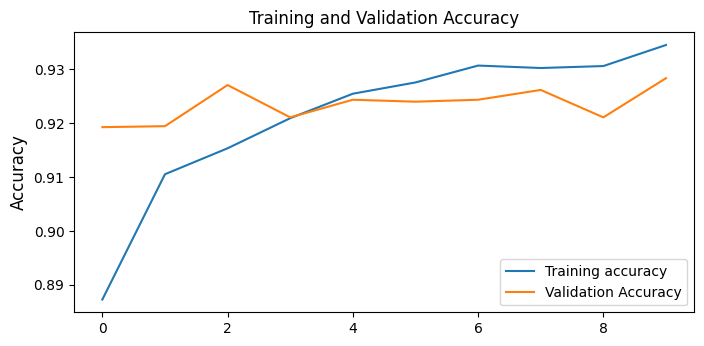

In [68]:
acc = history.history["accuracy"]
loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(acc,label="Training accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.show()

## Training and validation (test)loss 

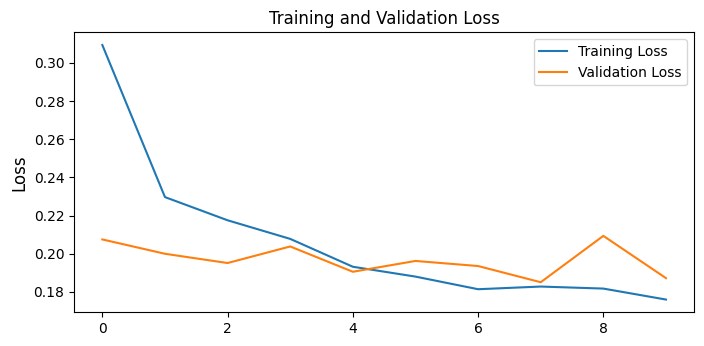

In [69]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label = "Validation Loss")
plt.legend()
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Loss",fontsize=12)
plt.show()

## Accuracy of inception on the image data 

173/173 [==============================] - 62s 359ms/step - loss: 0.1872 - accuracy: 0.9283
Testing Accuracy: 0.9283121824264526
1/1 [==============================] - 0s 64ms/step


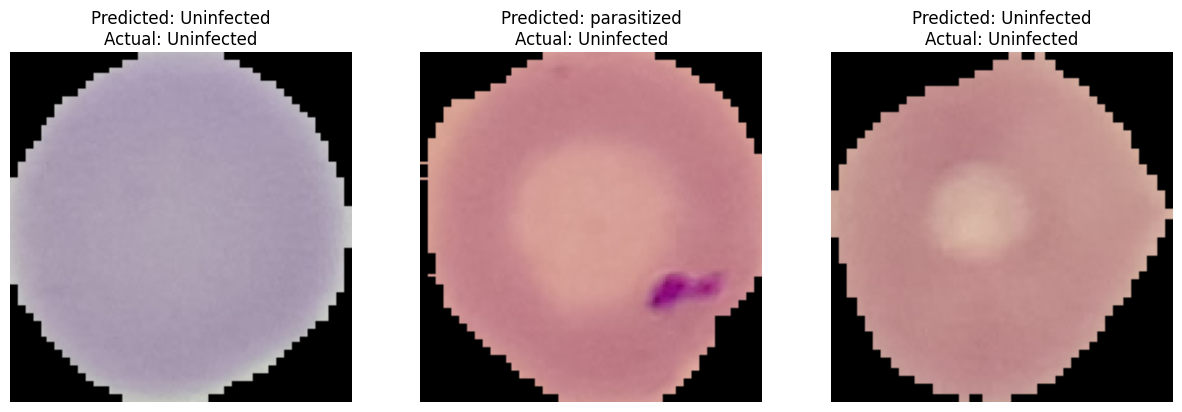

In [70]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Testing Accuracy: {test_accuracy}')

# Display sample images from the test set with predicted and actual labels
sample_size = 3
fig, axs = plt.subplots(1, sample_size, figsize=(15, 5))

for j in range(sample_size):
    # Select a random image from the test set
    random_image_path = random.choice(test_generator.filepaths)
    
    # Load and preprocess the image
    img = image.load_img(random_image_path, target_size=(134, 131))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    # Predict the class of the image
    prediction = model.predict(img_array)
    predicted_class = np.round(prediction).astype(int)[0][0]

    # Extract the actual label from the image path
    if 'uninfected' in random_image_path:
        actual_label = 0  # uninfected
    else:
        actual_label = 1  # parasitized

    # Display the image
    axs[j].imshow(img)
    axs[j].set_title(f"Predicted: {class_labels[predicted_class]}\nActual: {class_labels[actual_label]}")
    axs[j].axis('off')

plt.show()


## Xception model 

In [71]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the pre-trained Xception model without the top layers
base_model = Xception(weights='imagenet', include_top=False, input_shape=(134, 131, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Flatten the output of the base model
x = Flatten()(base_model.output)

# Add fully connected layers
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(50, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 134, 131, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 66, 65, 32)   864         ['input_3[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 66, 65, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                            

## Training the model 

In [72]:
# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=test_generator)

Epoch 1/10
689/689 [==============================] - 687s 991ms/step - loss: 0.2877 - accuracy: 0.8967 - val_loss: 0.1962 - val_accuracy: 0.9278
Epoch 2/10
689/689 [==============================] - 706s 1s/step - loss: 0.2023 - accuracy: 0.9255 - val_loss: 0.1868 - val_accuracy: 0.9332
Epoch 3/10
689/689 [==============================] - 681s 989ms/step - loss: 0.1835 - accuracy: 0.9320 - val_loss: 0.1761 - val_accuracy: 0.9372
Epoch 4/10
689/689 [==============================] - 697s 1s/step - loss: 0.1738 - accuracy: 0.9360 - val_loss: 0.1682 - val_accuracy: 0.9399
Epoch 5/10
689/689 [==============================] - 769s 1s/step - loss: 0.1578 - accuracy: 0.9416 - val_loss: 0.1843 - val_accuracy: 0.9312
Epoch 6/10
689/689 [==============================] - 4487s 7s/step - loss: 0.1512 - accuracy: 0.9444 - val_loss: 0.1671 - val_accuracy: 0.9416
Epoch 7/10
689/689 [==============================] - 675s 980ms/step - loss: 0.1464 - accuracy: 0.9457 - val_loss: 0.1950 - val_accura

## Training and validation Accuracy 

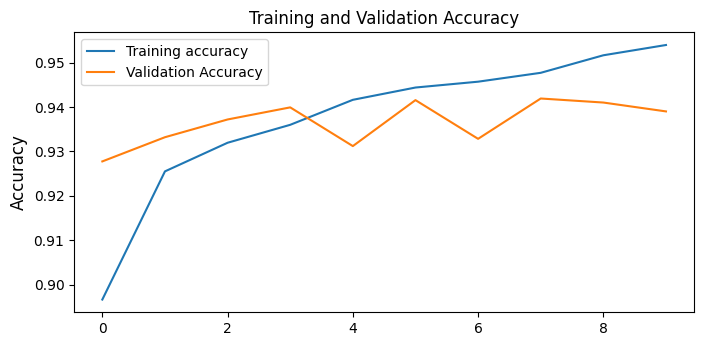

In [73]:
acc = history.history["accuracy"]
loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(acc,label="Training accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.show()

## Training and validation (test) loss

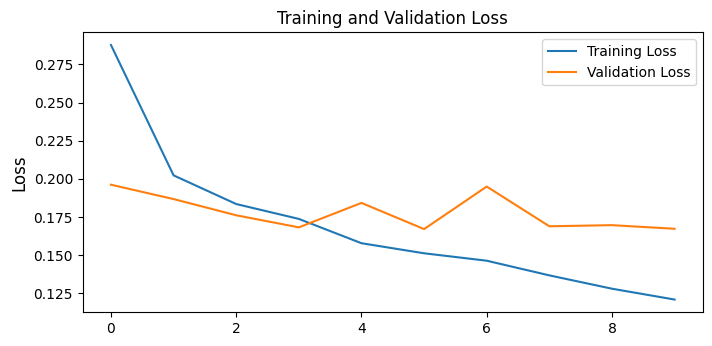

In [74]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label = "Validation Loss")
plt.legend()
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Loss",fontsize=12)
plt.show()

## Accuracy for Xception Model on the image dataset 

173/173 [==============================] - 129s 745ms/step - loss: 0.1673 - accuracy: 0.9390
Testing Accuracy: 0.9390199780464172
1/1 [==============================] - 0s 91ms/step


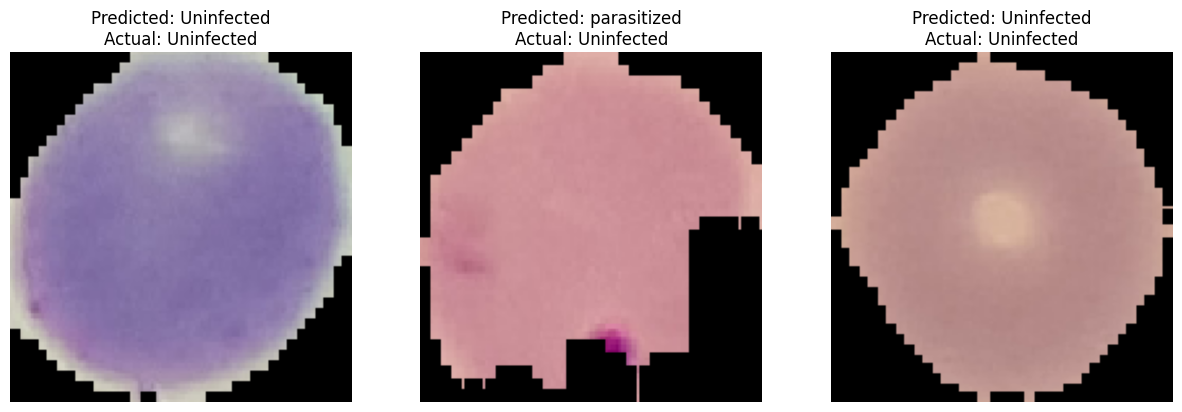

In [75]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Testing Accuracy: {test_accuracy}')

# Display sample images from the test set with predicted and actual labels
sample_size = 3
fig, axs = plt.subplots(1, sample_size, figsize=(15, 5))

for j in range(sample_size):
    # Select a random image from the test set
    random_image_path = random.choice(test_generator.filepaths)
    
    # Load and preprocess the image
    img = image.load_img(random_image_path, target_size=(134, 131))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    # Predict the class of the image
    prediction = model.predict(img_array)
    predicted_class = np.round(prediction).astype(int)[0][0]

    # Extract the actual label from the image path
    if 'uninfected' in random_image_path:
        actual_label = 0  # uninfected
    else:
        actual_label = 1  # parasitized

    # Display the image
    axs[j].imshow(img)
    axs[j].set_title(f"Predicted: {class_labels[predicted_class]}\nActual: {class_labels[actual_label]}")
    axs[j].axis('off')

plt.show()


## DenseNet model 

In [76]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the pre-trained DenseNet121 model without the top layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(134, 131, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Flatten the output of the base model
x = Flatten()(base_model.output)

# Add fully connected layers
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(50, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 134, 131, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 140, 137, 3)  0          ['input_4[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 67, 66, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 67, 66, 64)   256         ['conv1/conv[0][0]']       

## Training the model 

In [77]:
# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=test_generator)

Epoch 1/10
689/689 [==============================] - 758s 1s/step - loss: 0.3398 - accuracy: 0.8811 - val_loss: 0.1750 - val_accuracy: 0.9381
Epoch 2/10
689/689 [==============================] - 715s 1s/step - loss: 0.2023 - accuracy: 0.9254 - val_loss: 0.1644 - val_accuracy: 0.9385
Epoch 3/10
689/689 [==============================] - 724s 1s/step - loss: 0.1812 - accuracy: 0.9338 - val_loss: 0.1677 - val_accuracy: 0.9430
Epoch 4/10
689/689 [==============================] - 734s 1s/step - loss: 0.1766 - accuracy: 0.9336 - val_loss: 0.1587 - val_accuracy: 0.9446
Epoch 5/10
689/689 [==============================] - 725s 1s/step - loss: 0.1627 - accuracy: 0.9380 - val_loss: 0.1530 - val_accuracy: 0.9468
Epoch 6/10
689/689 [==============================] - 714s 1s/step - loss: 0.1600 - accuracy: 0.9412 - val_loss: 0.1511 - val_accuracy: 0.9461
Epoch 7/10
689/689 [==============================] - 693s 1s/step - loss: 0.1529 - accuracy: 0.9410 - val_loss: 0.1763 - val_accuracy: 0.9452

## Training and validation (test) accuracy 

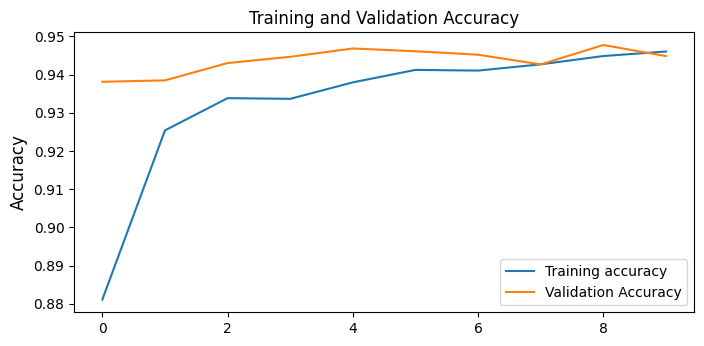

In [78]:
acc = history.history["accuracy"]
loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(acc,label="Training accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.show()

## Training and validation (test) loss

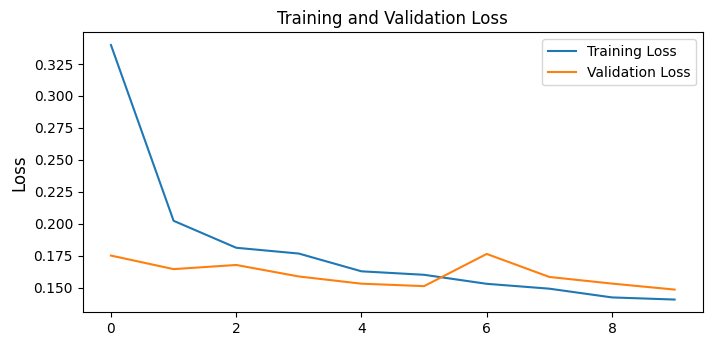

In [79]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label = "Validation Loss")
plt.legend()
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Loss",fontsize=12)
plt.show()

## Accuracy of the model on the image dataset

173/173 [==============================] - 140s 807ms/step - loss: 0.1484 - accuracy: 0.9448
Testing Accuracy: 0.9448275566101074
1/1 [==============================] - 0s 112ms/step


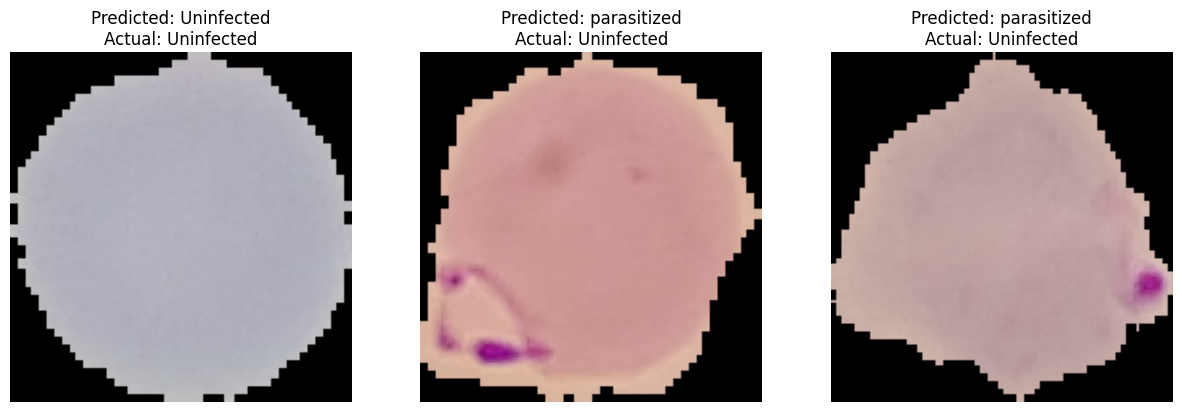

In [80]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Testing Accuracy: {test_accuracy}')

# Display sample images from the test set with predicted and actual labels
sample_size = 3
fig, axs = plt.subplots(1, sample_size, figsize=(15, 5))

for j in range(sample_size):
    # Select a random image from the test set
    random_image_path = random.choice(test_generator.filepaths)
    
    # Load and preprocess the image
    img = image.load_img(random_image_path, target_size=(134, 131))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    # Predict the class of the image
    prediction = model.predict(img_array)
    predicted_class = np.round(prediction).astype(int)[0][0]

    # Extract the actual label from the image path
    if 'uninfected' in random_image_path:
        actual_label = 0  # uninfected
    else:
        actual_label = 1  # parasitized

    # Display the image
    axs[j].imshow(img)
    axs[j].set_title(f"Predicted: {class_labels[predicted_class]}\nActual: {class_labels[actual_label]}")
    axs[j].axis('off')

plt.show()
